In [84]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook

In [47]:
# define the inter-state density overlap metric
def ISDOM(X, BINS, RANGE):
    N_states = X.shape[0]                   # Number of states
    HIST_list = []                          # Stores histogram for each state
    for idx in range(N_states):
        state_i = X[idx]                    # Get i-th state samples from X
        binhs, binrs = np.histogramdd(state_i, bins=BINS, range=RANGE)
        HIST_list.append(binhs.flatten())
    HIST_list = np.array(HIST_list)[:,:,np.newaxis]        
    P_i = HIST_list.repeat(HIST_list.shape[0],axis=2)     # Flattened probability of state i
    P_j = P_i.T                                           # Flattened probability of state j
    PO_ij = np.sum(np.minimum(P_i,P_j),axis=1)            # Probability overlap matrix
    DO_ij = PO_ij/np.sum(HIST_list,axis=1)                # Density overlap matrix
    A_ij = np.ones((N_states,N_states))
    np.fill_diagonal(A_ij,0)
    O_i = np.sum(DO_ij*A_ij,axis=1)
    return O_i

<IPython.core.display.Javascript object>


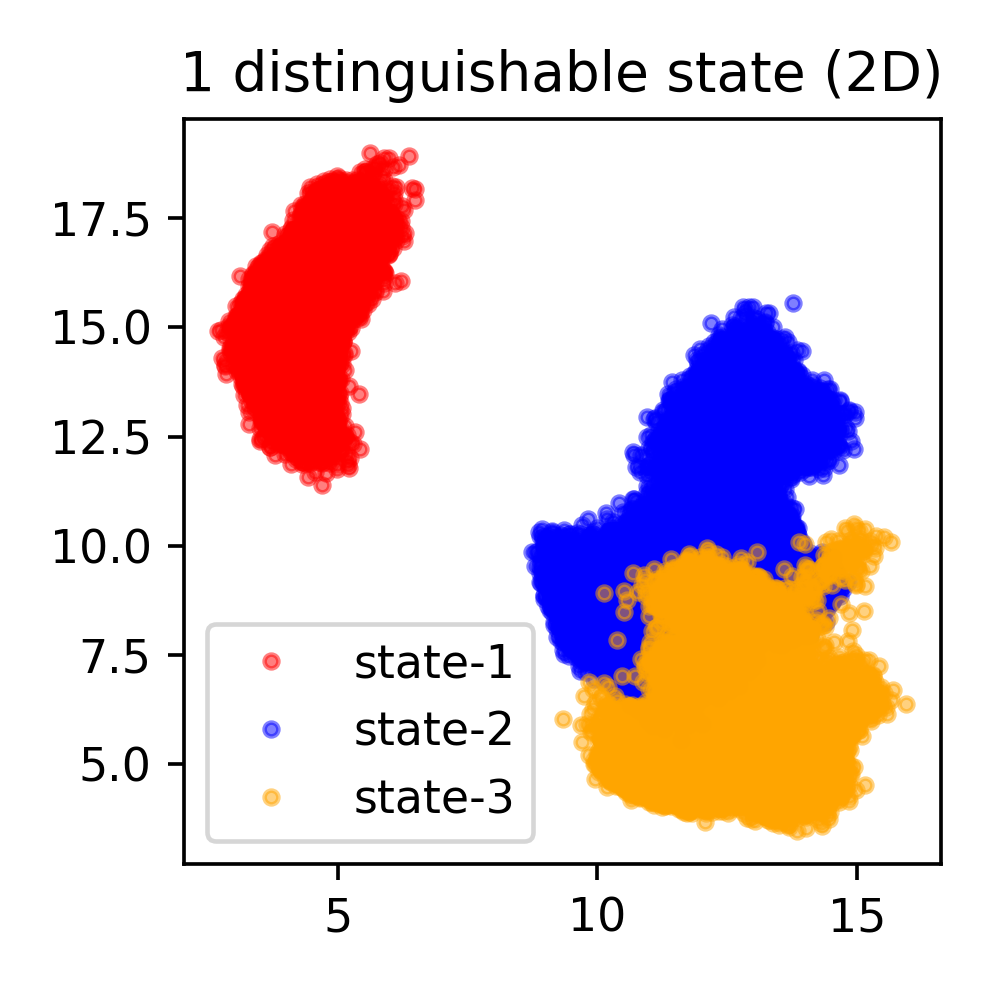

The overlap array is = [0.0, 0.032073333333333336, 0.032073333333333336]
ISDOM = 1


In [99]:
#Example 1
ex1 = np.load('data_1.npz')
s1 = ex1['state1']
s2 = ex1['state2']
s3 = ex1['state3']
plt.figure(dpi=300,figsize=(3,3))
plt.plot(*list(s1.T),'.',color='red',alpha=0.5,label='state-1')
plt.plot(*list(s2.T),'.',color='blue',alpha=0.5,label='state-2')
plt.plot(*list(s3.T),'.',color='orange',alpha=0.5,label='state-3')
plt.title('1 distinguishable state (2D)')
plt.legend()
plt.tight_layout()
Z=np.array([s1,s2,s3])
Ovlp=ISDOM(Z,BINS=50,RANGE=[[1,20],[1,20]])
print('The overlap array is =',list(Ovlp))
print('ISDOM =',1)

<IPython.core.display.Javascript object>


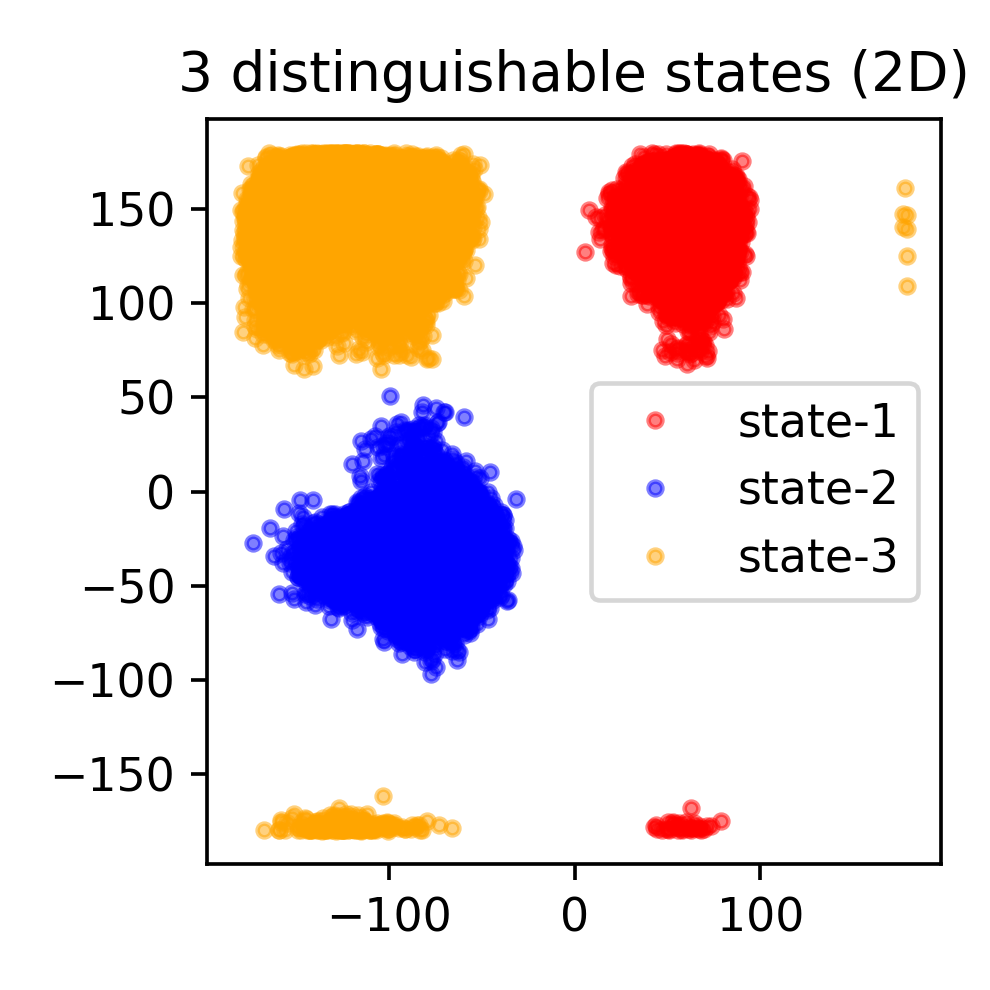

The overlap array is = [0.0, 0.0, 0.0]
ISDOM = 1


In [100]:
#Example 2
ex1 = np.load('data_2.npz')
s1 = ex1['state1']
s2 = ex1['state2']
s3 = ex1['state3']
plt.figure(dpi=300,figsize=(3,3))
plt.plot(*list(s1.T),'.',color='red',alpha=0.5,label='state-1')
plt.plot(*list(s2.T),'.',color='blue',alpha=0.5,label='state-2')
plt.plot(*list(s3.T),'.',color='orange',alpha=0.5,label='state-3')
plt.title('3 distinguishable states (2D)')
plt.legend()
plt.tight_layout()
Z=np.array([s1,s2,s3])
Ovlp=ISDOM(Z,BINS=50,RANGE=[[-180,180],[-180,180]])
print('The overlap array is =',list(Ovlp))
print('ISDOM =',1)

<IPython.core.display.Javascript object>


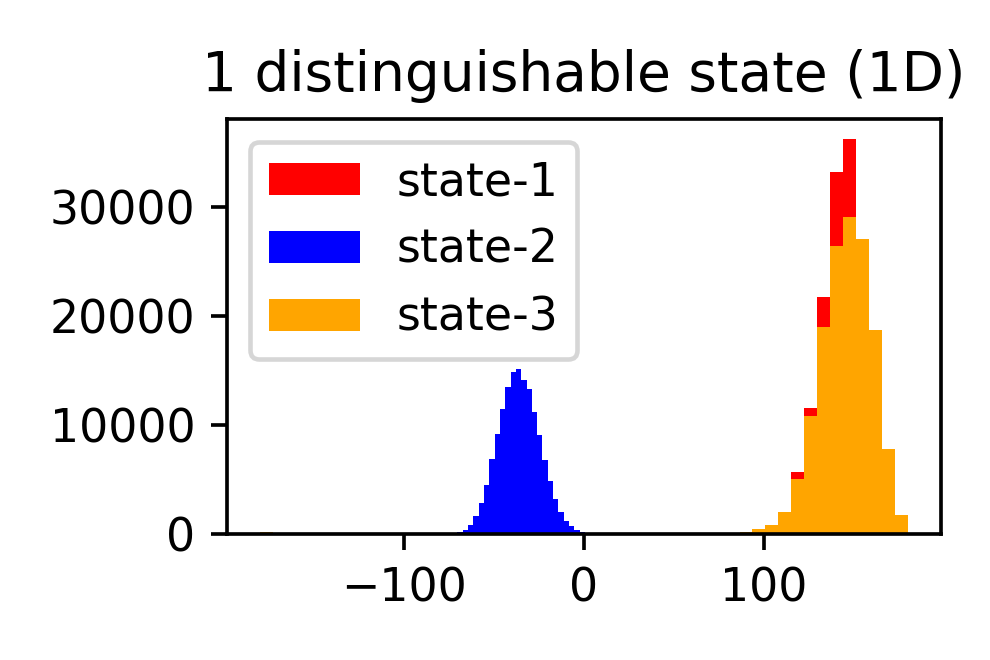

The overlap array is = [0.8778666666666667, 0.0, 0.8778666666666667]
ISDOM = 1


In [101]:
#Example 3
ex1 = np.load('data_3.npz')
s1 = ex1['state1']
s2 = ex1['state2']
s3 = ex1['state3']
plt.figure(dpi=300,figsize=(3,2))
plt.hist(s1,bins=50,color='red',label='state-1')
plt.hist(s2,bins=50,color='blue',label='state-2')
plt.hist(s3,bins=50,color='orange',label='state-3')
plt.title('1 distinguishable state (1D)')
plt.legend()
plt.tight_layout()
Z=np.array([s1,s2,s3])
Ovlp=ISDOM(Z,BINS=50,RANGE=[[-180,180]])
print('The overlap array is =',list(Ovlp))
print('ISDOM =',1)

<IPython.core.display.Javascript object>


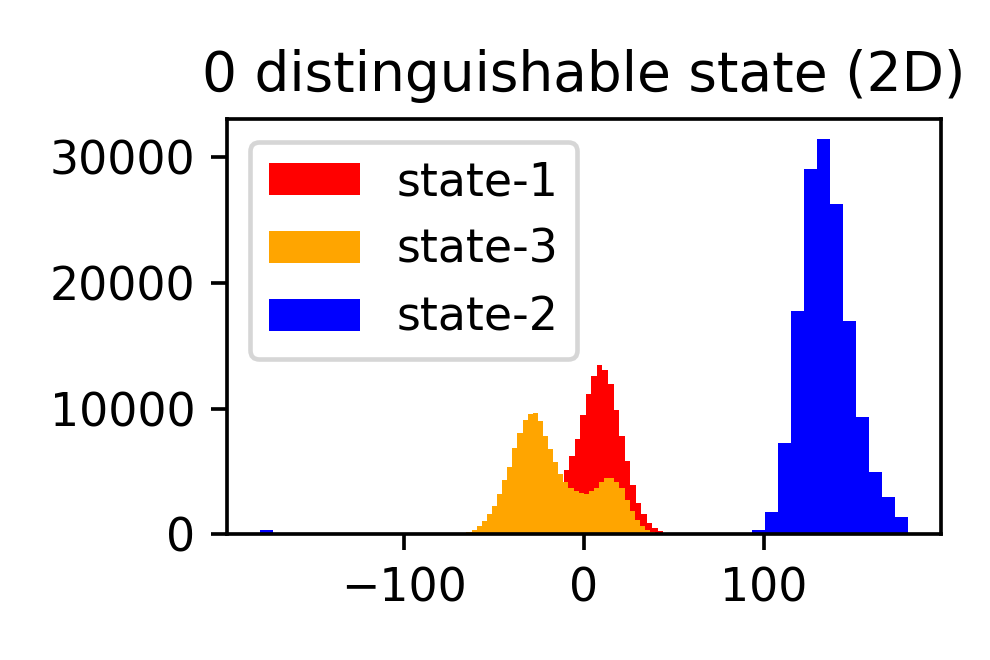

The overlap array is = [0.5338933333333333, 0.0008733333333333334, 0.5337]
ISDOM = 1


In [103]:
#Example 4
ex1 = np.load('data_4.npz')
s1 = ex1['state1']
s2 = ex1['state2']
s3 = ex1['state3']
plt.figure(dpi=300,figsize=(3,2))
plt.hist(s1,bins=50,color='red',label='state-1')
plt.hist(s3,bins=50,color='orange',label='state-3')
plt.hist(s2,bins=50,color='blue',label='state-2')
plt.title('0 distinguishable state (2D)')
plt.legend()
plt.tight_layout()
Z=np.array([s1,s2,s3])
Ovlp=ISDOM(Z,BINS=50,RANGE=[[-180,180]])
print('The overlap array is =',list(Ovlp))
print('ISDOM =',1)

Example 4 shows the critical analysis performed by ISDOM. Although a visual observation of the plot hardly shows any overlap of state-2 with other states. A zoom in the X range 40 - 100 showcases the non-zero overlap almost invisible to naked eye.

<IPython.core.display.Javascript object>


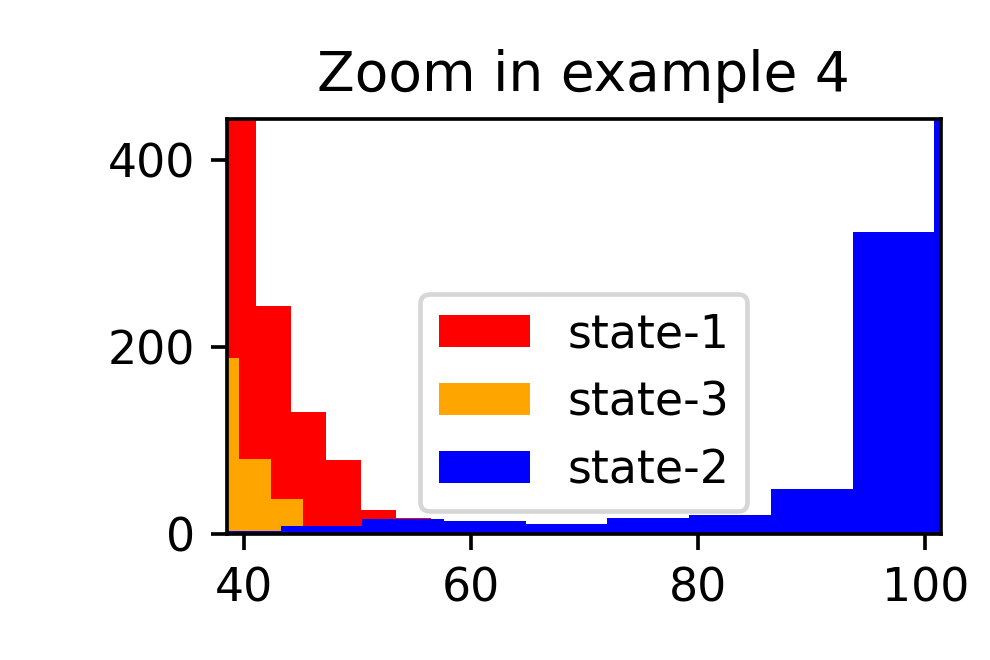

In [105]:
plt.figure(dpi=300,figsize=(3,2))
plt.hist(s1,bins=50,color='red',label='state-1')
plt.hist(s3,bins=50,color='orange',label='state-3')
plt.hist(s2,bins=50,color='blue',label='state-2')
plt.title('Zoom in example 4')
plt.legend()
plt.tight_layout()